# **Metro interstate trafic volume**

# **Problem Statement**

This project aims to analyze and model traffic volume patterns on Interstate 94 in Minneapolis-St. Paul using historical weather and date-time data, in order to predict future traffic volumes and understand the impact of external factors such as weather conditions, holidays, and time of day.



# **Goal**

Predict traffic volume using weather and time data.

Find patterns in traffic throughout the day, week, and year.

Understand how weather (like rain or snow) affects traffic.

Check if holidays or weekends change traffic behavior.

Help improve city planning by showing when and why roads get busy

# **Understanding Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Metro_Interstate_Traffic_Volume.csv')
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB
None


In [ ]:
print(df.head())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


# **Data clening**

In [ ]:
print(df.isnull().sum())

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64


In [ ]:
# df.dropna(inplace=True)

In [ ]:
print( df.duplicated().sum())

17


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print(df.isnull().sum())

holiday                48126
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64


In [ ]:
print(df.describe())

               temp       rain_1h       snow_1h    clouds_all  traffic_volume
count  48187.000000  48187.000000  48187.000000  48187.000000    48187.000000
mean     281.204995      0.334382      0.000222     49.365451     3259.618134
std       13.338738     44.797033      0.008169     39.015213     1986.954465
min        0.000000      0.000000      0.000000      0.000000        0.000000
25%      272.160000      0.000000      0.000000      1.000000     1192.500000
50%      282.450000      0.000000      0.000000     64.000000     3379.000000
75%      291.806000      0.000000      0.000000     90.000000     4933.000000
max      310.070000   9831.300000      0.510000    100.000000     7280.000000


In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [ ]:
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year

In [ ]:
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)


In [ ]:
df['is_holiday'] = df['holiday'].apply(lambda x: 0 if x == 'None' else 1)

In [ ]:
 #Encode categorical variables
df = pd.get_dummies(df, columns=['weather_main', 'weather_description'], drop_first=True)

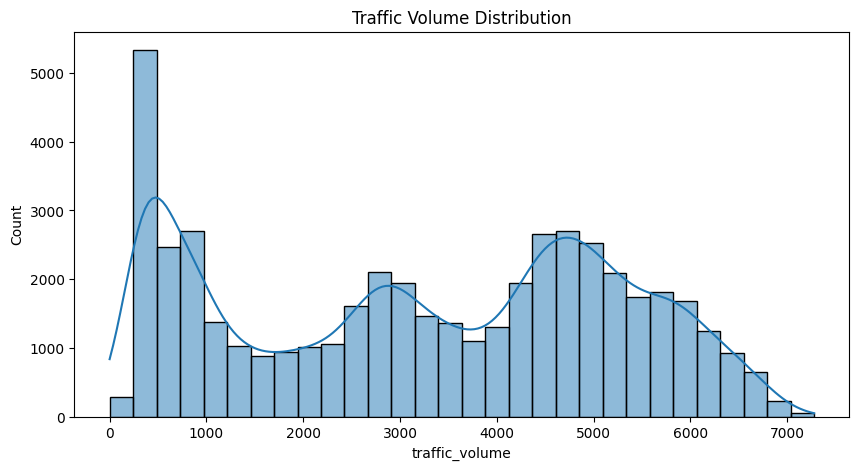

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['traffic_volume'], bins=30, kde=True)
plt.title("Traffic Volume Distribution")
plt.show()

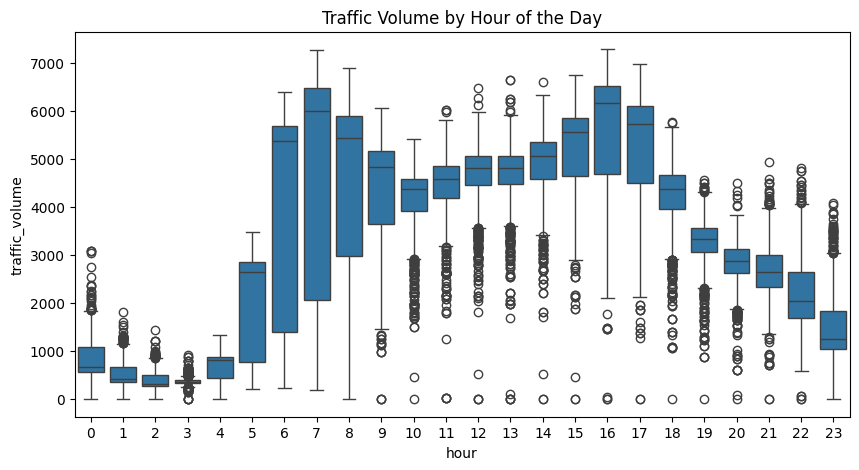

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['hour'], y=df['traffic_volume'])
plt.title("Traffic Volume by Hour of the Day")
plt.show()

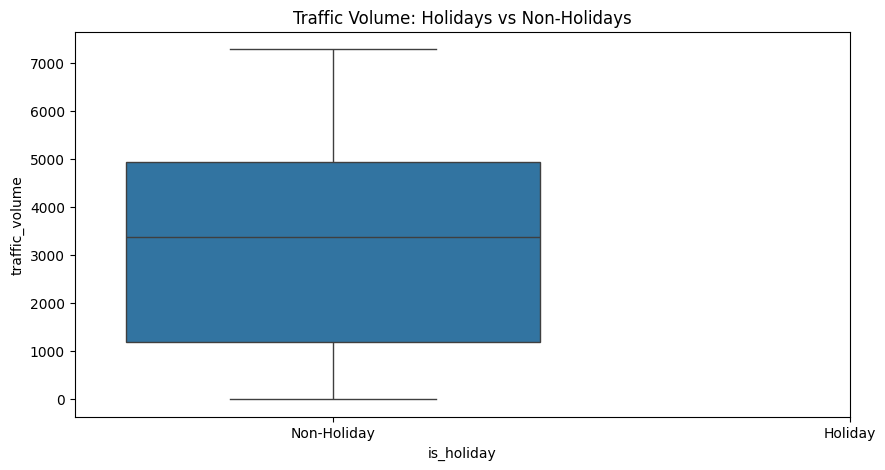

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['is_holiday'], y=df['traffic_volume'])
plt.title("Traffic Volume: Holidays vs Non-Holidays")
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

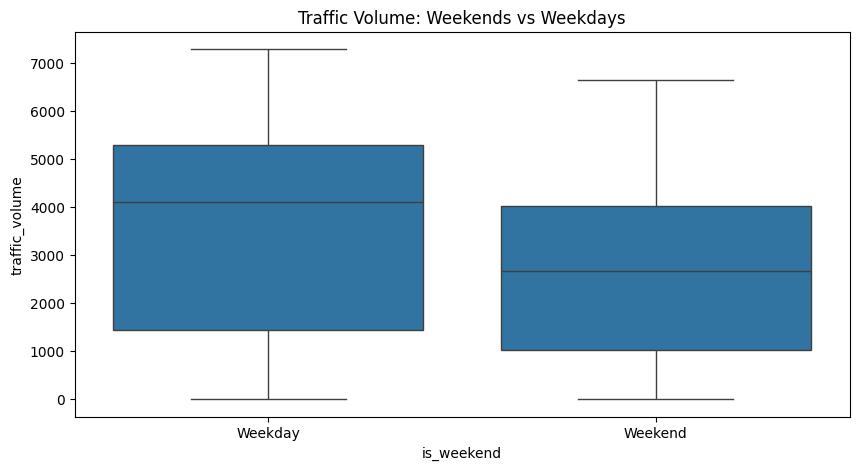

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['is_weekend'], y=df['traffic_volume'])
plt.title("Traffic Volume: Weekends vs Weekdays")
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

In [ ]:
data = df.copy()
data['A'] = data['traffic_volume']

In [ ]:
Q1 = df['traffic_volume'].quantile(0.25)
Q3 = df['traffic_volume'].quantile(0.75)

In [ ]:
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Identify outliers using the IQR method
outliers_iqr = data[(data['A'] < lower_bound) | (data['A'] > upper_bound)]
print(f"Outliers detected using IQR:\n{outliers_iqr}\n")

Outliers detected using IQR:
Empty DataFrame
Columns: [holiday, temp, rain_1h, snow_1h, clouds_all, date_time, traffic_volume, hour, day_of_week, month, year, is_weekend, is_holiday, weather_main_Clouds, weather_main_Drizzle, weather_main_Fog, weather_main_Haze, weather_main_Mist, weather_main_Rain, weather_main_Smoke, weather_main_Snow, weather_main_Squall, weather_main_Thunderstorm, weather_description_Sky is Clear, weather_description_broken clouds, weather_description_drizzle, weather_description_few clouds, weather_description_fog, weather_description_freezing rain, weather_description_haze, weather_description_heavy intensity drizzle, weather_description_heavy intensity rain, weather_description_heavy snow, weather_description_light intensity drizzle, weather_description_light intensity shower rain, weather_description_light rain, weather_description_light rain and snow, weather_description_light shower snow, weather_description_light snow, weather_description_mist, weather_descr

In [ ]:
import scipy.stats as stats

z_scores = stats.zscore(data['A'])  # Now you can use stats.zscore
outliers_z = data[np.abs(z_scores) > 3]
print(f"Outliers detected using Z-score:\n{outliers_z}\n")

Outliers detected using Z-score:
Empty DataFrame
Columns: [holiday, temp, rain_1h, snow_1h, clouds_all, date_time, traffic_volume, hour, day_of_week, month, year, is_weekend, is_holiday, weather_main_Clouds, weather_main_Drizzle, weather_main_Fog, weather_main_Haze, weather_main_Mist, weather_main_Rain, weather_main_Smoke, weather_main_Snow, weather_main_Squall, weather_main_Thunderstorm, weather_description_Sky is Clear, weather_description_broken clouds, weather_description_drizzle, weather_description_few clouds, weather_description_fog, weather_description_freezing rain, weather_description_haze, weather_description_heavy intensity drizzle, weather_description_heavy intensity rain, weather_description_heavy snow, weather_description_light intensity drizzle, weather_description_light intensity shower rain, weather_description_light rain, weather_description_light rain and snow, weather_description_light shower snow, weather_description_light snow, weather_description_mist, weather_d

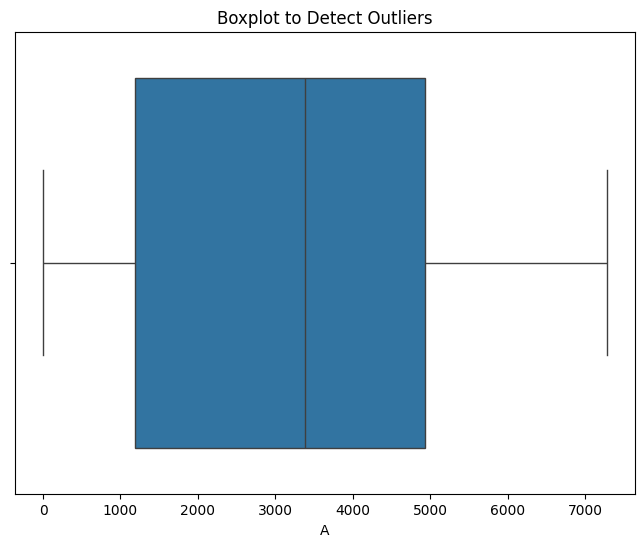

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['A'])
plt.title("Boxplot to Detect Outliers")
plt.show()


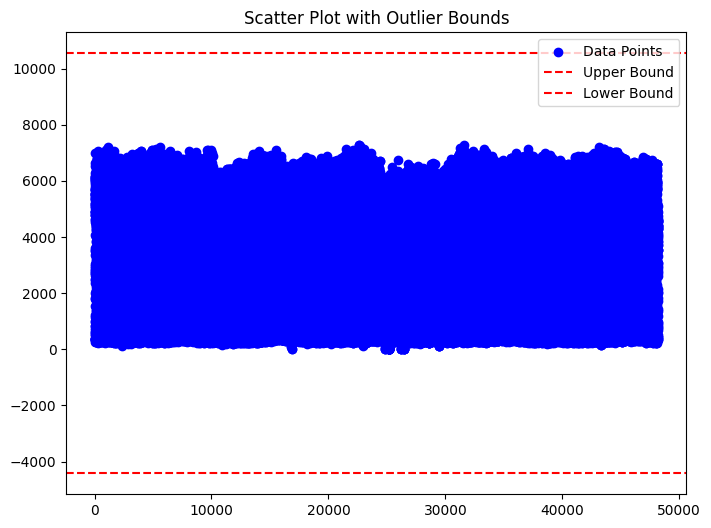

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data.index, data['A'], c='blue', label='Data Points')
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Upper Bound')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Lower Bound')
plt.title("Scatter Plot with Outlier Bounds")
plt.legend()
plt.show()

In [ ]:
data_no_outliers = data[(data['A'] >= lower_bound) & (data['A'] <= upper_bound)]
print(f"Data after removing outliers:\n{data_no_outliers}\n")

Data after removing outliers:
      holiday    temp  rain_1h  snow_1h  clouds_all           date_time  \
0         NaN  288.28      0.0      0.0          40 2012-10-02 09:00:00   
1         NaN  289.36      0.0      0.0          75 2012-10-02 10:00:00   
2         NaN  289.58      0.0      0.0          90 2012-10-02 11:00:00   
3         NaN  290.13      0.0      0.0          90 2012-10-02 12:00:00   
4         NaN  291.14      0.0      0.0          75 2012-10-02 13:00:00   
...       ...     ...      ...      ...         ...                 ...   
48199     NaN  283.45      0.0      0.0          75 2018-09-30 19:00:00   
48200     NaN  282.76      0.0      0.0          90 2018-09-30 20:00:00   
48201     NaN  282.73      0.0      0.0          90 2018-09-30 21:00:00   
48202     NaN  282.09      0.0      0.0          90 2018-09-30 22:00:00   
48203     NaN  282.12      0.0      0.0          90 2018-09-30 23:00:00   

       traffic_volume  hour  day_of_week  month  ...  \
0            

In [ ]:
data_capped = data.copy()
data_capped['A'] = np.where(data_capped['A'] > upper_bound, upper_bound, data_capped['A'])
data_capped['A'] = np.where(data_capped['A'] < lower_bound, lower_bound, data_capped['A'])
print(f"Data after capping outliers:\n{data_capped}\n")

Data after capping outliers:
      holiday    temp  rain_1h  snow_1h  clouds_all           date_time  \
0         NaN  288.28      0.0      0.0          40 2012-10-02 09:00:00   
1         NaN  289.36      0.0      0.0          75 2012-10-02 10:00:00   
2         NaN  289.58      0.0      0.0          90 2012-10-02 11:00:00   
3         NaN  290.13      0.0      0.0          90 2012-10-02 12:00:00   
4         NaN  291.14      0.0      0.0          75 2012-10-02 13:00:00   
...       ...     ...      ...      ...         ...                 ...   
48199     NaN  283.45      0.0      0.0          75 2018-09-30 19:00:00   
48200     NaN  282.76      0.0      0.0          90 2018-09-30 20:00:00   
48201     NaN  282.73      0.0      0.0          90 2018-09-30 21:00:00   
48202     NaN  282.09      0.0      0.0          90 2018-09-30 22:00:00   
48203     NaN  282.12      0.0      0.0          90 2018-09-30 23:00:00   

       traffic_volume  hour  day_of_week  month  ...  \
0             

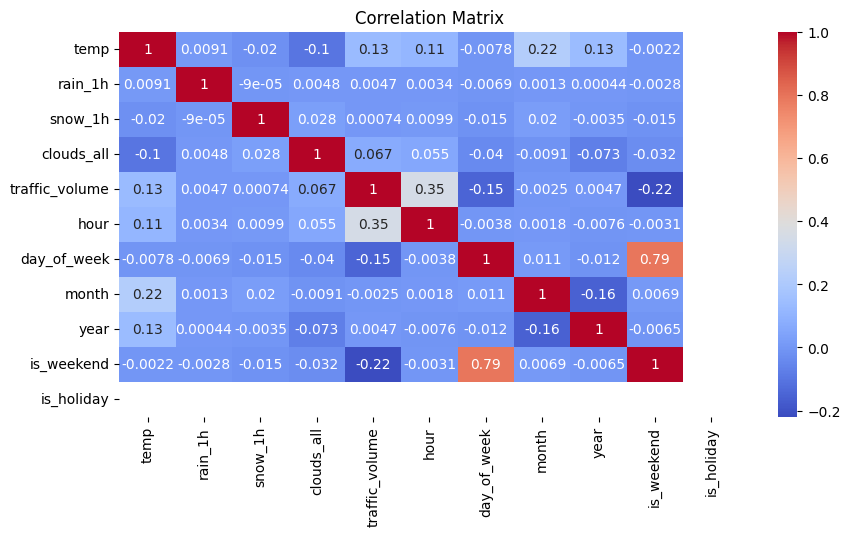

In [ ]:
plt.figure(figsize=(10, 5))
# Exclude non-numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

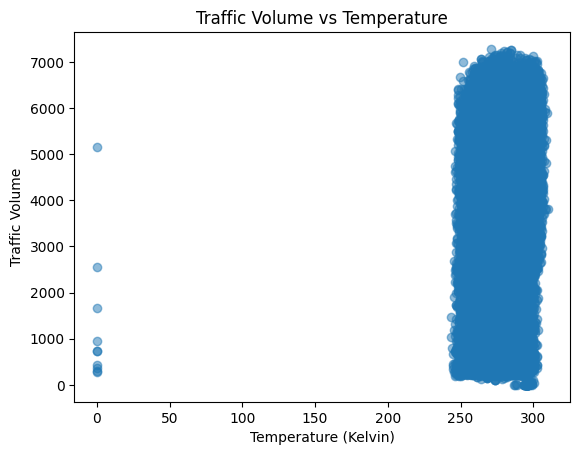

In [ ]:
plt.scatter(df['temp'], df['traffic_volume'], alpha=0.5)
plt.xlabel("Temperature (Kelvin)")
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume vs Temperature")
plt.show()

In [ ]:
# Select features and target
features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'hour', 'day_of_week', 'month', 'is_weekend', 'is_holiday'] + \
           [col for col in df.columns if 'weather_' in col]
target = 'traffic_volume'

In [ ]:
X = df[features]
y = df[target]

In [ ]:
from sklearn.model_selection import train_test_split
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression  # Import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Performance:")
    print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}\n")


Linear Regression Performance:
RMSE: 4181.33, MAE: 1617.50, R2: -3.37

Random Forest Performance:
RMSE: 442.73, MAE: 250.63, R2: 0.95

